In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2023.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0             Player   Nation    Pos  \
0              0       Adama Traoré   es ESP  FW,MF   
1              1    Marcel Sabitzer   at AUT     MF   
2              2      Ruben Aguilar   fr FRA  DF,MF   
3              3    Vinicius Júnior   br BRA     FW   
4              4      Fikayo Tomori  eng ENG     DF   
...          ...                ...      ...    ...   
1507        2504   Souleymane Touré   fr FRA     DF   
1508        2506        Jere Uronen   fi FIN     DF   
1509        2507         Yan Valery   tn TUN     DF   
1510        2513            Vitinha   pt POR     MF   
1511        2518  Alessandro Zanoli   it ITA     DF   

                                                  Squad  \
0                               Wolves+Wolves+Barcelona   
1     RB Leipzig+RB Leipzig+Bayern Munich+Manchester...   
2                                                Monaco   
3                                           Real Madrid   
4                                   Chelsea+Milan+Milan   
...                                                 ...   
1507                                  Marseille+Auxerre   
1508                                   Brest+Schalke 04   
1509                                 Southampton+Angers   
1510                                Marseille+Paris S-G   
1511                                   Sampdoria+Napoli   

                                                  Comp   Age    Born     MP  \
0     eng Premier League+eng Premier League+es La Liga  27.0  1996.0  102.0   
1       de Bundesliga+eng Premier League+de Bundesliga  29.0  1994.0   80.0   
2                                           fr Ligue 1  30.0  1993.0   81.0   
3                                           es La Liga  23.0  2000.0  103.0   
4             eng Premier League+it Serie A+it Serie A  25.0  1997.0   82.0   
...                                                ...   ...     ...    ...   
1507                                        fr Ligue 1  19.0  2003.0   24.0   
1508                          fr Ligue 1+de Bundesliga  28.0  1994.0   17.0   
1509                     eng Premier League+fr Ligue 1  23.0  1999.0   31.0   
1510                                        fr Ligue 1  22.0  2000.0   50.0   
1511                                        it Serie A  21.0  2000.0   23.0   

      Starts     Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0       54.0  5594.0  62.1         0.08       0.16        0.08          0.16   
1       46.0  4235.0  47.1         0.21       0.34        0.13          0.25   
2       63.0  5537.0  61.5         0.02       0.10        0.02          0.10   
3       84.0  7482.0  83.2         0.36       0.62        0.36          0.62   
4       78.0  6989.0  77.7         0.02       0.04        0.02          0.04   
...      ...     ...   ...          ...        ...         ...           ...   
1507    18.0  1656.0  18.4         0.05       0.05        0.05          0.05   
1508    12.0   976.0  10.8         0.00       0.09        0.00          0.09   
1509    31.0  2542.0  28.2         0.00       0.00        0.00          0.00   
1510    34.0  2910.0  32.4         0.12       0.22        0.12          0.22   
1511    16.0  1552.0  17.2         0.12       0.29        0.12          0.29   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.11          0.31        0.11            0.31               457.0   
1         0.25          0.31        0.17            0.25                38.0   
2         0.02          0.13        0.02            0.13                54.0   
3         0.35          0.62        0.35            0.62               596.0   
4         0.04          0.04        0.04            0.04                22.0   
...        ...           ...         ...             ...                 ...   
1507      0.08          0.02        0.08            0.02                19.0   
1508      0.01          0.13        0.01            0.13                12.0   
1509  

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out only the Forwards (FW) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'] == 'FW']
newbie=newbie[newbie['Pos']=='FW']
player_2021=player_2021[player_2021['Pos']=='FW']
player_2022=player_2022[player_2022['Pos']=='FW']
player_2023=player_2023[player_2023['Pos']=='FW']
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [5]:
# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2023

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
0              11          13             Tammy Abraham  eng ENG  FW   
2              16          19                 Che Adams  sct SCO  FW   
6              70          80            Miguel Almirón   py PAR  FW   
8              93         105           Felipe Anderson   br BRA  FW   
9              95         107             Komnen Andrić   rs SRB  FW   
11            105         117           Michail Antonio   jm JAM  FW   
12            106         118                    Antony   br BRA  FW   
14            122         135          Marko Arnautović   at AUT  FW   
15            129         143                    Arthur   br BRA  FW   
17            137         152                Iago Aspas   es ESP  FW   
18            146         166             Taiwo Awoniyi   ng NGA  FW   
19            179         206           Folarin Balogun   us USA  FW   
20            181         208            Jonathan Bamba   ci CIV  FW   
21            182         209           Patrick Bamford  eng ENG  FW   
24            222         254           Sheraldo Becker   sr SUR  FW   
25            225         260             Kevin Behrens   de GER  FW   
26            238         275            Andrea Belotti   it ITA  FW   
27            242         279         Wissam Ben Yedder   fr FRA  FW   
28            249         289             Karim Benzema   fr FRA  FW   
29            250         290          Domenico Berardi   it ITA  FW   
30            252         292            Álex Berenguer   es ESP  FW   
31            255         297            Mergim Berisha   de GER  FW   
32            261         304                      Beto   gw GNB  FW   
34            317         367                Lucas Boyé   ar ARG  FW   
37            340         396              Ante Budimir   hr CRO  FW   
38            377         436     Dominic Calvert-Lewin  eng ENG  FW   
39            387         446            Sergio Camello   es ESP  FW   
42            416         491      Valentín Castellanos   ar ARG  FW   
43            425         500            Edinson Cavani   uy URU  FW   
44            429         504              Assan Ceesay   gm GAM  FW   
47            467         546            Daniel Ciofani   it ITA  FW   
49            487         568           Lorenzo Colombo   it ITA  FW   
52            505         588            Joaquín Correa   ar ARG  FW   
53            510         593               Diego Costa   es ESP  FW   
56            539         629             Moanes Dabbur   il ISR  FW   
57            543         634               Patson Daka   zm ZAM  FW   
58            544         635            Thijs Dallinga   nl NED  FW   
59            559         654            Jonathan David   ca CAN  FW   
60            573         670           Grégoire Defrel   mq MTQ  FW   
61            583         684           Ousmane Dembélé   fr FRA  FW   
62            594         702            Cyriel Dessers   ng NGA  FW   
63            597         705           Gerard Deulofeu   es ESP  FW   
65            611         720              Habib Diallo   sn SEN  FW   
66            622         732                 Luis Díaz   co COL  FW   
72            672         796          Dion Drena Beljo   hr CRO  FW   
73            675         800            Marvin Ducksch   de GER  FW   
74            684         812                 Hugo Duro   es ESP  FW   
75            687         815                Edin Džeko   ba BIH  FW   
76            693         822           Odsonne Édouard   fr FRA  FW   
78            701         832              Hugo Ekitike   fr FRA  FW   
80            713         846              Breel Embolo   ch SUI  FW   
81            715         848         Youssef En-Nesyri   ma MAR  FW   
82            741         884                 Ansu Fati   es ESP  FW   
84            751         898             Evan Ferguson   ie IRL  FW   
86            771         925                

In [6]:
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)

In [7]:
Lukaku=player_2021[player_2021['Player']=='Romelu Lukaku']
Lukaku

Unnamed: 0.1  Unnamed: 0         Player  Nation Pos  Squad        Comp  \
103          1301      1524.0  Romelu Lukaku  be BEL  FW  Inter  it Serie A   

      Age    Born    MP  Starts     Min   90s  Goals_per90  G+A_per90  \
103  27.0  1993.0  36.0    32.0  2884.0  32.0         0.75       1.09   

     G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
103        0.56           0.9      0.72          0.94        0.57   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
103            0.79                93.0           53.0            57.0   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
103              39.0               41.9           35.19   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
103                    1.22                    1.94                   13.66   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
103                   20.12                    6.72   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
103                       35.0                       2.91   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
103                  1.66                     1.22           19.62   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
103                 119.22                                60.28   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
103                        2.41                1.44   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
103                         1.56                2.91                 1.53   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
103                   28.62                                9.22   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
103                        3.96                     0.87   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
103                   2.84                    0.0                  0.56   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
103              0.41                     0.16                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
103                   0.56                    0.0                  0.16   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
103              0.16                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
103             538.0             762.0               70.6          6581.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
103          1431.0             334.0             424.0               78.8   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
103              108.0              154.0                70.1   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
103             22.0             38.0              57.9            0.34   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
103        0.22       0.17          0.12               1.62   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
103               1.16                        1.19   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
103                         0.06                       2.56   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
103                    23.81                    21.81   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
103                     1.75                     0.03                  0.19   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
103             0.31            0.59                     0.0   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
103                  0.0                     0.0                

In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
lukaku_percentile_ranks = round(players_percentile_ranks.iloc[[103]],0)

# Print the percentile ranks for Declan Rice
print(lukaku_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
103         94.0       97.0        88.0          95.0      96.0          96.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
103        93.0            95.0                90.0           90.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
103            58.0              88.0               32.0            52.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
103                    83.0                    21.0                    32.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
103                    66.0                    93.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
103                       52.0                       78.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
103                  80.0                     73.0            57.0   

     Tota

In [9]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Key_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
lukaku_percentile_ranks = round(players_percentile_ranks.iloc[[103]],0)

# Print the percentile ranks for Harry Kane
print(lukaku_percentile_ranks)


     G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
103        88.0          95.0        93.0            95.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
103                        91.0                     98.0            96.0   

     xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
103        88.0       87.0               87.0                        85.0   

     Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  \
103            81.0                      72.0           93.0   

     Key_Passes_per_90  
103               87.0  


In [10]:
lukaku_percentile_ranks_list = lukaku_percentile_ranks.values.flatten().tolist()

lukaku_percentile_ranks_list

[88.0,
 95.0,
 93.0,
 95.0,
 91.0,
 98.0,
 96.0,
 88.0,
 87.0,
 87.0,
 85.0,
 81.0,
 72.0,
 93.0,
 87.0]

In [11]:
image_path = "Lukaku.png"
fdj_cropped = Image.open(image_path)


In [12]:
len(params)

15

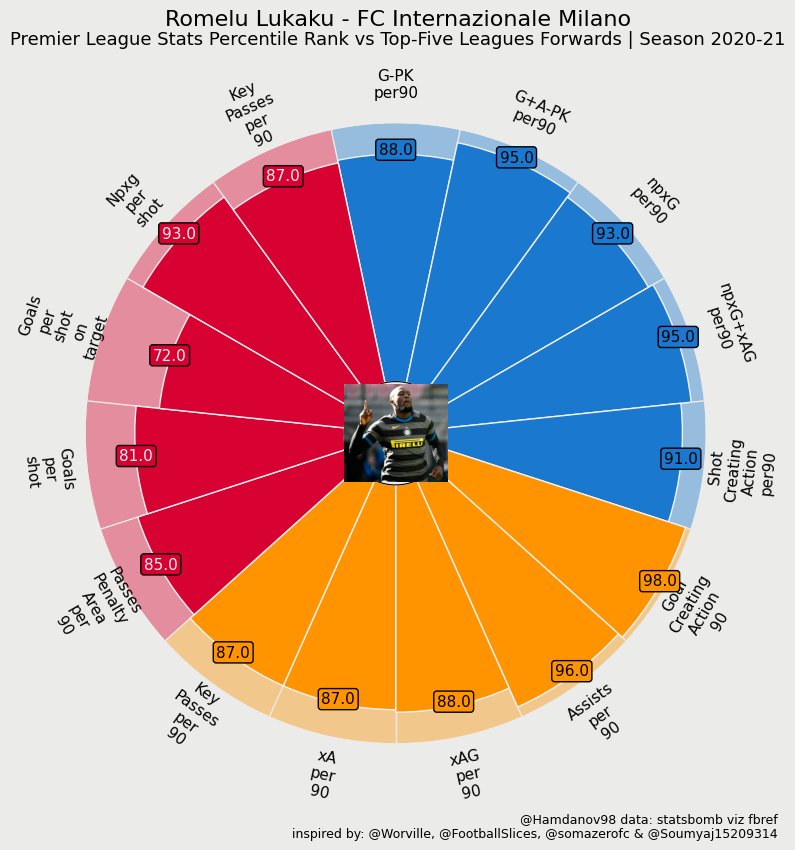

In [13]:
split_params = [param.replace('_', '\n') for param in params]
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    lukaku_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Romelu Lukaku - FC Internazionale Milano", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Forwards | Season 2020-21",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Lukaku_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [14]:
player_2023 = player_2023[player_2023['Player'] != 'Romelu Lukaku']
player_2023


Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
0              11          13             Tammy Abraham  eng ENG  FW   
1              16          19                 Che Adams  sct SCO  FW   
2              70          80            Miguel Almirón   py PAR  FW   
3              93         105           Felipe Anderson   br BRA  FW   
4              95         107             Komnen Andrić   rs SRB  FW   
5             105         117           Michail Antonio   jm JAM  FW   
6             106         118                    Antony   br BRA  FW   
7             122         135          Marko Arnautović   at AUT  FW   
8             129         143                    Arthur   br BRA  FW   
9             137         152                Iago Aspas   es ESP  FW   
10            146         166             Taiwo Awoniyi   ng NGA  FW   
11            179         206           Folarin Balogun   us USA  FW   
12            181         208            Jonathan Bamba   ci CIV  FW   
13            182         209           Patrick Bamford  eng ENG  FW   
14            222         254           Sheraldo Becker   sr SUR  FW   
15            225         260             Kevin Behrens   de GER  FW   
16            238         275            Andrea Belotti   it ITA  FW   
17            242         279         Wissam Ben Yedder   fr FRA  FW   
18            249         289             Karim Benzema   fr FRA  FW   
19            250         290          Domenico Berardi   it ITA  FW   
20            252         292            Álex Berenguer   es ESP  FW   
21            255         297            Mergim Berisha   de GER  FW   
22            261         304                      Beto   gw GNB  FW   
23            317         367                Lucas Boyé   ar ARG  FW   
24            340         396              Ante Budimir   hr CRO  FW   
25            377         436     Dominic Calvert-Lewin  eng ENG  FW   
26            387         446            Sergio Camello   es ESP  FW   
27            416         491      Valentín Castellanos   ar ARG  FW   
28            425         500            Edinson Cavani   uy URU  FW   
29            429         504              Assan Ceesay   gm GAM  FW   
30            467         546            Daniel Ciofani   it ITA  FW   
31            487         568           Lorenzo Colombo   it ITA  FW   
32            505         588            Joaquín Correa   ar ARG  FW   
33            510         593               Diego Costa   es ESP  FW   
34            539         629             Moanes Dabbur   il ISR  FW   
35            543         634               Patson Daka   zm ZAM  FW   
36            544         635            Thijs Dallinga   nl NED  FW   
37            559         654            Jonathan David   ca CAN  FW   
38            573         670           Grégoire Defrel   mq MTQ  FW   
39            583         684           Ousmane Dembélé   fr FRA  FW   
40            594         702            Cyriel Dessers   ng NGA  FW   
41            597         705           Gerard Deulofeu   es ESP  FW   
42            611         720              Habib Diallo   sn SEN  FW   
43            622         732                 Luis Díaz   co COL  FW   
44            672         796          Dion Drena Beljo   hr CRO  FW   
45            675         800            Marvin Ducksch   de GER  FW   
46            684         812                 Hugo Duro   es ESP  FW   
47            687         815                Edin Džeko   ba BIH  FW   
48            693         822           Odsonne Édouard   fr FRA  FW   
49            701         832              Hugo Ekitike   fr FRA  FW   
50            713         846              Breel Embolo   ch SUI  FW   
51            715         848         Youssef En-Nesyri   ma MAR  FW   
52            741         884                 Ansu Fati   es ESP  FW   
53            751         898             Evan Ferguson   ie IRL  FW   
54            771         925                

In [15]:
player_2023=pd.concat([player_2023,Lukaku])
player_2023=player_2023.reset_index(drop=True)
player_2023

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
0              11        13.0             Tammy Abraham  eng ENG  FW   
1              16        19.0                 Che Adams  sct SCO  FW   
2              70        80.0            Miguel Almirón   py PAR  FW   
3              93       105.0           Felipe Anderson   br BRA  FW   
4              95       107.0             Komnen Andrić   rs SRB  FW   
5             105       117.0           Michail Antonio   jm JAM  FW   
6             106       118.0                    Antony   br BRA  FW   
7             122       135.0          Marko Arnautović   at AUT  FW   
8             129       143.0                    Arthur   br BRA  FW   
9             137       152.0                Iago Aspas   es ESP  FW   
10            146       166.0             Taiwo Awoniyi   ng NGA  FW   
11            179       206.0           Folarin Balogun   us USA  FW   
12            181       208.0            Jonathan Bamba   ci CIV  FW   
13            182       209.0           Patrick Bamford  eng ENG  FW   
14            222       254.0           Sheraldo Becker   sr SUR  FW   
15            225       260.0             Kevin Behrens   de GER  FW   
16            238       275.0            Andrea Belotti   it ITA  FW   
17            242       279.0         Wissam Ben Yedder   fr FRA  FW   
18            249       289.0             Karim Benzema   fr FRA  FW   
19            250       290.0          Domenico Berardi   it ITA  FW   
20            252       292.0            Álex Berenguer   es ESP  FW   
21            255       297.0            Mergim Berisha   de GER  FW   
22            261       304.0                      Beto   gw GNB  FW   
23            317       367.0                Lucas Boyé   ar ARG  FW   
24            340       396.0              Ante Budimir   hr CRO  FW   
25            377       436.0     Dominic Calvert-Lewin  eng ENG  FW   
26            387       446.0            Sergio Camello   es ESP  FW   
27            416       491.0      Valentín Castellanos   ar ARG  FW   
28            425       500.0            Edinson Cavani   uy URU  FW   
29            429       504.0              Assan Ceesay   gm GAM  FW   
30            467       546.0            Daniel Ciofani   it ITA  FW   
31            487       568.0           Lorenzo Colombo   it ITA  FW   
32            505       588.0            Joaquín Correa   ar ARG  FW   
33            510       593.0               Diego Costa   es ESP  FW   
34            539       629.0             Moanes Dabbur   il ISR  FW   
35            543       634.0               Patson Daka   zm ZAM  FW   
36            544       635.0            Thijs Dallinga   nl NED  FW   
37            559       654.0            Jonathan David   ca CAN  FW   
38            573       670.0           Grégoire Defrel   mq MTQ  FW   
39            583       684.0           Ousmane Dembélé   fr FRA  FW   
40            594       702.0            Cyriel Dessers   ng NGA  FW   
41            597       705.0           Gerard Deulofeu   es ESP  FW   
42            611       720.0              Habib Diallo   sn SEN  FW   
43            622       732.0                 Luis Díaz   co COL  FW   
44            672       796.0          Dion Drena Beljo   hr CRO  FW   
45            675       800.0            Marvin Ducksch   de GER  FW   
46            684       812.0                 Hugo Duro   es ESP  FW   
47            687       815.0                Edin Džeko   ba BIH  FW   
48            693       822.0           Odsonne Édouard   fr FRA  FW   
49            701       832.0              Hugo Ekitike   fr FRA  FW   
50            713       846.0              Breel Embolo   ch SUI  FW   
51            715       848.0         Youssef En-Nesyri   ma MAR  FW   
52            741       884.0                 Ansu Fati   es ESP  FW   
53            751       898.0             Evan Ferguson   ie IRL  FW   
54            771       925.0                

In [16]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_midfield_players = player_2023.select_dtypes(include=np.number)
numerical_midfield_players = numerical_midfield_players.iloc[:, 9:]
numerical_midfield_players = numerical_midfield_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_midfield_players = (numerical_midfield_players - numerical_midfield_players.mean()) / numerical_midfield_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_midfield_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.32814907426491463,
 0.4200255184581577,
 0.478937692623701,
 0.5286026565642039,
 0.5678491327531738,
 0.6039099560074807,
 0.6336874073892692,
 0.6628847347880649,
 0.6887025566422624,
 0.7098915284679024,
 0.7295670111035383,
 0.7468107478784518,
 0.7615872256061709,
 0.7759602440150523,
 0.789954159684368]

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_midfield_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_midfield_players.index)



In [18]:
# Remove lukaku's row and store it in a separate variable
lukaku_data = transformed_df.iloc[-1].copy()
transformed_df = transformed_df.drop(transformed_df.index[-1])

# Compute cosine similarity between each player and Declan lukaku
similarity_scores = cosine_similarity(transformed_df, lukaku_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_lukaku'] = similarity_scores

# Display the top 10 players most similar to lukaku
top_similar_players = transformed_df.sort_values('similarity_to_lukaku', ascending=False).head(10)
top_similar_players

0         1         2         3         4         5         6  \
92    2.155671  7.423997  2.037922 -1.156581  0.536384 -0.281556 -2.329060   
99    1.748857  5.140331  0.746745 -0.851606 -1.408305  0.925238 -1.016308   
17    1.204573  6.223294  0.910693 -0.154442  0.431750 -0.968425 -0.114183   
136   3.817128  3.767326 -1.544949  0.056293 -0.483247 -0.236267  1.600347   
95    8.207844  2.598031 -1.664719  1.386869  2.802213  0.432523  1.170131   
139   8.811551  5.093012 -0.685764 -1.850530  0.853797 -0.396938 -0.418376   
75    1.537039  3.413902 -0.840472 -0.842920 -0.307096 -0.414083  0.474590   
104  14.772697  9.245139 -1.300652 -1.522064 -0.407313  2.377011 -1.745252   
154  -0.281238  3.535431 -2.219976  0.469700  1.761369  0.258864 -1.334401   
89    3.651982  5.128506  1.945314 -1.255551 -1.993579  1.064686 -1.273838   

            7         8         9        10        11        12        13  \
92   0.152870 -0.542320 -0.536332 -2.026107  0.456612 -0.861060  0.908709   
99   0.425304  1.676280  0.501318  1.432774  0.240455  0.240939 -0.108745   
17  -0.067193  1.181023  1.034122  2.381918  0.232337 -0.073545  2.164260   
136 -2.675322 -0.965666  0.255976 -0.238920  0.974052 -0.743625 -1.506267   
95   1.680309 -0.759325  0.730536  0.330054  0.334393  0.127321 -0.944977   
139 -2.696138 -2.025284  2.028577  0.896870  0.489589 -1.870455  1.749735   
75   3.567114  1.572083 -0.600372  1.526930  2.794170 -2.095332 -0.429635   
104 -3.425074 -3.645502 -2.220393  0.124387  0.523711 -1.039375 -0.232997   
154 -0.446893 -0.098365  1.296203 -0.934306  2.895435  0.394352  1.198577   
89  -0.243446  1.210641  0.966917  0.480264 -0.248522  2.325082  0.657633   

           14  similarity_to_lukaku  
92   1.534687              0.744845  
99   1.283226              0.722785  
17   0.744770              0.677020  
136  0.278571              0.660669  
95  -0.750148              0.652796  
139  2.092858              0.641901  
75  -1.877824              0.629686  
104 -1.921912              0.623403  
154  0.417111              0.620547  
89   1.038163              0.601098

In [19]:
# Get the top 10 players most similar to rice
top_similar_players_indices = transformed_df.sort_values('similarity_to_lukaku', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = player_2023.loc[top_similar_players_indices]
top_similar_players

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
92           1276      1526.0        Robert Lewandowski   pl POL  FW   
99           1403      1684.0          Lautaro Martínez   ar ARG  FW   
17            242       279.0         Wissam Ben Yedder   fr FRA  FW   
136          1826      2201.0           Marcus Rashford  eng ENG  FW   
95           1357      1625.0             Donyell Malen   nl NED  FW   
139          1927      2334.0             Mohamed Salah   eg EGY  FW   
75           1092      1310.0                Diogo Jota   pt POR  FW   
104          1439      1724.0             Kylian Mbappé   fr FRA  FW   
154          2140      2614.0             Marcus Thuram   fr FRA  FW   
89           1220      1455.0       Alexandre Lacazette   fr FRA  FW   
84           1176      1404.0         Randal Kolo Muani   fr FRA  FW   
61            937      1129.0            Erling Haaland   no NOR  FW   
111          1529      1838.0             Gerard Moreno   es ESP  FW   
52            741       884.0                 Ansu Fati   es ESP  FW   
73           1076      1291.0             Gabriel Jesus   br BRA  FW   
123          1652      1985.0               Loïs Openda   be BEL  FW   
126          1661      1995.0            Victor Osimhen   ng NGA  FW   
97           1393      1673.0           Anthony Martial   fr FRA  FW   
102          1429      1713.0  Eric Maxim Choupo-Moting   cm CMR  FW   
168          2296      2804.0             Callum Wilson  eng ENG  FW   
18            249       289.0             Karim Benzema   fr FRA  FW   
62            949      1141.0          Sébastien Haller   ci CIV  FW   
112          1538      1849.0         Youssoufa Moukoko   de GER  FW   
87           1214      1445.0     Khvicha Kvaratskhelia   ge GEO  FW   
47            687       815.0                Edin Džeko   ba BIH  FW   
37            559       654.0            Jonathan David   ca CAN  FW   
98           1400      1680.0                Martinelli   br BRA  FW   
77           1102      1322.0           Vinicius Júnior   br BRA  FW   
72           1055      1265.0           Nicolas Jackson   sn SEN  FW   
54            771       925.0                Phil Foden  eng ENG  FW   
50            713       846.0              Breel Embolo   ch SUI  FW   
79           1126      1350.0                Harry Kane  eng ENG  FW   
120          1616      1940.0              Darwin Núñez   uy URU  FW   
70           1041      1246.0             Ciro Immobile   it ITA  FW   
39            583       684.0           Ousmane Dembélé   fr FRA  FW   
137          1919      2326.0       Allan Saint-Maximin   fr FRA  FW   
11            179       206.0           Folarin Balogun   us USA  FW   
138          1922      2329.0               Bukayo Saka  eng ENG  FW   
34            539       629.0             Moanes Dabbur   il ISR  FW   
135          1823      2198.0                  Raphinha   br BRA  FW   
66           1025      1226.0            Rasmus Højlund   dk DEN  FW   
43            622       732.0                 Luis Díaz   co COL  FW   
19            250       290.0          Domenico Berardi   it ITA  FW   
55            801       961.0           Niclas Füllkrug   de GER  FW   
110          1525      1832.0             Álvaro Morata   es ESP  FW   
193          2453        90.0               Terem Moffi   ng NGA  FW   
58            894      1074.0             Jack Grealish  eng ENG  FW   
2              70        80.0            Miguel Almirón   py PAR  FW   
49            701       832.0              Hugo Ekitike   fr FRA  FW   
41            597       705.0           Gerard Deulofeu   es ESP  FW   
162          2263      2768.0                 Elye Wahi   fr FRA  FW   
53            751       898.0             Evan Ferguson   ie IRL  FW   
12            181       208.0            Jonathan Bamba   ci CIV  FW   
164          2283      2789.0             Danny Welbeck  eng ENG  FW   
186          2427        64.0            Alex

In [20]:
player_2023['similarity_to_lukaku']=transformed_df['similarity_to_lukaku']
player_2023[['Player', 'similarity_to_lukaku']]


Player  similarity_to_lukaku
0               Tammy Abraham              0.124233
1                   Che Adams             -0.402494
2              Miguel Almirón              0.224175
3             Felipe Anderson              0.118347
4               Komnen Andrić             -0.301997
5             Michail Antonio             -0.119022
6                      Antony              0.008001
7            Marko Arnautović             -0.235764
8                      Arthur             -0.182736
9                  Iago Aspas              0.092375
10              Taiwo Awoniyi             -0.067027
11            Folarin Balogun              0.330493
12             Jonathan Bamba              0.199015
13            Patrick Bamford             -0.236853
14            Sheraldo Becker              0.176127
15              Kevin Behrens             -0.154770
16             Andrea Belotti             -0.578835
17          Wissam Ben Yedder              0.677020
18              Karim Benzema              0.476315
19           Domenico Berardi              0.254201
20             Álex Berenguer             -0.145339
21             Mergim Berisha             -0.235605
22                       Beto             -0.055345
23                 Lucas Boyé             -0.007412
24               Ante Budimir             -0.422449
25      Dominic Calvert-Lewin             -0.353977
26             Sergio Camello             -0.235823
27       Valentín Castellanos             -0.414179
28             Edinson Cavani             -0.451307
29               Assan Ceesay             -0.479344
30             Daniel Ciofani             -0.335386
31            Lorenzo Colombo             -0.474453
32             Joaquín Correa             -0.064331
33                Diego Costa             -0.715992
34              Moanes Dabbur              0.295499
35                Patson Daka              0.079274
36             Thijs Dallinga             -0.226473
37             Jonathan David              0.404773
38            Grégoire Defrel             -0.525433
39            Ousmane Dembélé              0.353306
40             Cyriel Dessers             -0.255961
41            Gerard Deulofeu              0.214505
42               Habib Diallo              0.119994
43                  Luis Díaz              0.257396
44           Dion Drena Beljo             -0.397173
45             Marvin Ducksch              0.036451
46                  Hugo Duro             -0.742332
47                 Edin Džeko              0.405384
48            Odsonne Édouard             -0.538779
49               Hugo Ekitike              0.219074
50               Breel Embolo              0.377030
51          Youssef En-Nesyri             -0.252363
52                  Ansu Fati              0.579980
53              Evan Ferguson              0.207701
54                 Phil Foden              0.380897
55            Niclas Füllkrug              0.241319
56              Kévin Gameiro             -0.101615
57             Olivier Giroud              0.066571
58              Jack Grealish              0.227512
59        Michael Gregoritsch             -0.019600
60             Gorka Guruzeta             -0.330615
61             Erling Haaland              0.580351
62           Sébastien Haller              0.467547
63              Luiz Henrique             -0.163308
64               Thomas Henry             -0.621947
65            Philipp Hofmann             -0.339978
66             Rasmus Højlund              0.261115
67         Mounaim El Idrissy             -0.732528
68             Borja Iglesias             -0.018046
69             Jonathan Ikone              0.126845
70              Ciro Immobile              0.356159
71                  Junya Ito              0.132498
72            Nicolas Jackson              0.390182
73              Gabriel Jesus              0.532179
74                     Joselu             -0.268503
75                 Diogo Jota              0.629686
76                 

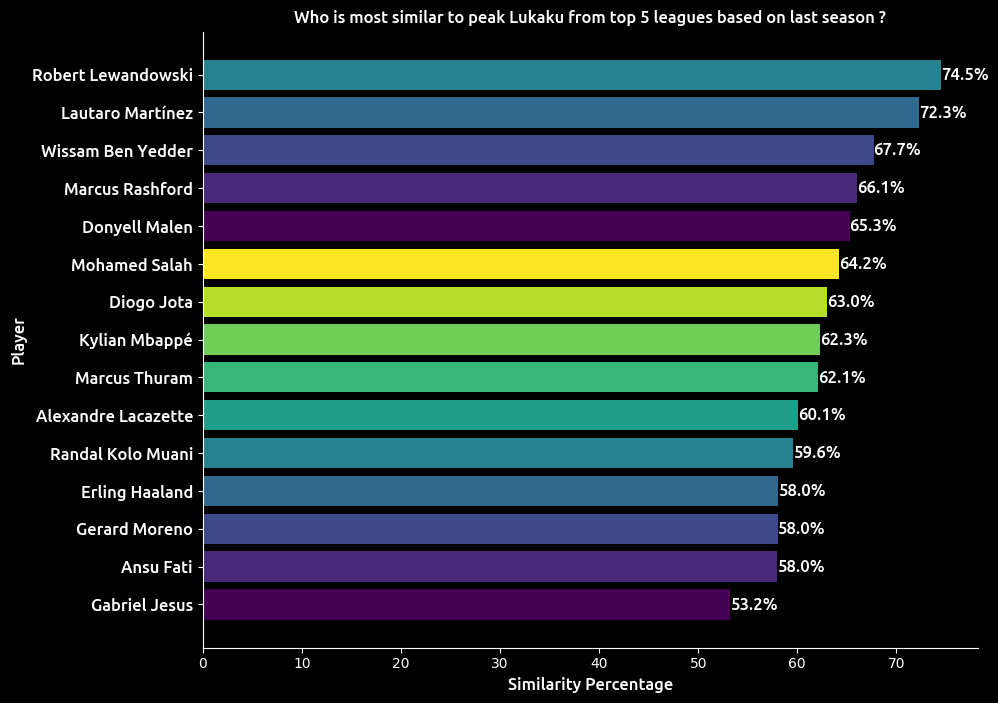

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2023 DataFrame by similarity_to_lukaku in descending order
player_2023_sorted = player_2023.sort_values(by='similarity_to_lukaku', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2023_sorted['Player'].head(15)[::-1], (player_2023_sorted['similarity_to_lukaku'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to peak Lukaku from top 5 leagues based on last season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2023_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [22]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_midfield_players = newbie.select_dtypes(include=np.number)
numerical_midfield_players = numerical_midfield_players.iloc[:, 4:]
numerical_midfield_players = numerical_midfield_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_midfield_players = (numerical_midfield_players - numerical_midfield_players.mean()) / numerical_midfield_players.std()
normalized_midfield_players['Seasons at top 5']=1
# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_midfield_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.2818412212865532,
 0.3809539421315683,
 0.47399568384146695,
 0.5332623378025964,
 0.5817647620371728,
 0.6198640690134395,
 0.6524841352531805,
 0.6825296513915518,
 0.7080551931695847,
 0.7320580093096553,
 0.7554752841292222,
 0.7767475984146293,
 0.7970218478764104,
 0.8156419538438574,
 0.8313567562512318]

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_midfield_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_midfield_players.index)



In [24]:
# Compute cosine similarity between each player and Declan lukaku
similarity_scores = cosine_similarity(transformed_df, lukaku_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_lukaku'] = similarity_scores

# Display the top 10 players most similar to lukaku
top_similar_players = transformed_df.sort_values('similarity_to_lukaku', ascending=False).head(10)
top_similar_players

0         1          2         3         4         5         6  \
25   0.176654  5.744592  -5.939999  2.780361  3.190738  1.181225 -2.786027   
41   0.432289  6.849830  -3.897164 -1.820902 -1.755954  0.853112 -2.053517   
5   -0.662526  7.098608   6.771853 -2.789850  6.454579 -1.694922  0.043728   
24  17.730618  3.731324   6.498714 -1.252695 -0.711316  0.587095 -1.166478   
15   9.659101  9.696095  10.837990 -1.968541  2.386113 -2.130168  3.891380   
29  20.617595  1.896889  -3.028846  0.958535 -0.102697  2.787193 -2.220166   
39   2.074684  3.401174  -5.023277 -2.497896 -1.270206 -1.813187  2.446286   
33   0.049660  5.620930  -4.144243  7.031748  1.616612  1.547543  0.645307   
18   5.799548  2.109076   1.643055  4.868218 -4.937278 -0.216036 -0.124460   
16   8.586698  0.107102  -6.453761  2.834081 -1.139484 -2.471386  2.865561   

           7         8         9        10        11        12        13  \
25 -1.829949 -4.226079 -0.994435  1.781547  3.041053  0.031813 -1.552733   
41 -0.296989 -0.142707 -0.532022 -0.303046 -0.224295  2.010364 -1.849820   
5   0.181483 -3.656827  2.895226  1.078316  2.226124 -1.125364  0.743885   
24  5.943961 -2.658241 -0.697759  1.203470 -0.641166  2.697096 -0.664612   
15 -3.954350  2.001757 -1.085554  0.199603 -1.102688  0.671869  2.482826   
29 -0.199248  3.691831  3.056404  0.782899 -0.297891 -2.101140 -1.908127   
39  2.793521 -0.975125  1.899285 -2.741805 -2.438218 -0.862744  0.026009   
33  1.013769  0.222848 -1.815482 -1.182982 -0.679993  2.045829  0.082833   
18 -0.342469  0.369186  1.214785  0.339463 -0.342538 -2.297311  0.551522   
16  0.263827  0.118811 -0.626097  0.665233  2.873177 -1.045291  2.837386   

          14  similarity_to_lukaku  
25  4.502928              0.576080  
41 -0.956686              0.528363  
5   0.250418              0.513132  
24 -1.279999              0.493965  
15  0.032457              0.465377  
29 -0.212306              0.447274  
39  2.054758              0.421864  
33 -1.900838              0.403465  
18  1.322242              0.377764  
16  0.299787              0.340712

In [25]:
# Get the top 10 players most similar to rice
top_similar_players_indices = transformed_df.sort_values('similarity_to_lukaku', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = newbie.loc[top_similar_players_indices]
top_similar_players

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
25          1055        1265           Nicolas Jackson   sn SEN  FW   
41          1652        1985               Loïs Openda   be BEL  FW   
5            255         297            Mergim Berisha   de GER  FW   
24          1049        1258                 Junya Ito   jp JPN  FW   
15           675         800            Marvin Ducksch   de GER  FW   
29          1214        1445     Khvicha Kvaratskhelia   ge GEO  FW   
39          1616        1940              Darwin Núñez   uy URU  FW   
33          1429        1713  Eric Maxim Choupo-Moting   cm CMR  FW   
18           801         961           Niclas Füllkrug   de GER  FW   
16           741         884                 Ansu Fati   es ESP  FW   
36          1538        1849         Youssoufa Moukoko   de GER  FW   
3            179         206           Folarin Balogun   us USA  FW   
1            106         118                    Antony   br BRA  FW   
4            225         260             Kevin Behrens   de GER  FW   
31          1235        1473                Cyle Larin   ca CAN  FW   
22          1025        1226            Rasmus Højlund   dk DEN  FW   
7            416         491      Valentín Castellanos   ar ARG  FW   
13           594         702            Cyriel Dessers   ng NGA  FW   
12           544         635            Thijs Dallinga   nl NED  FW   
9            467         546            Daniel Ciofani   it ITA  FW   
44          1766        2131             Gonzalo Plata   ec ECU  FW   
48          2089        2544          Cristhian Stuani   uy URU  FW   
32          1270        1518               Sergio León   es ESP  FW   
21          1003        1201           Philipp Hofmann   de GER  FW   
51          2144        2618            Steffen Tigges   de GER  FW   
19           928        1120            Gorka Guruzeta   es ESP  FW   
38          1606        1927             Eddie Nketiah  eng ENG  FW   
17           751         898             Evan Ferguson   ie IRL  FW   
56          2437          74               Sam Lammers   nl NED  FW   
6            387         446            Sergio Camello   es ESP  FW   
20           977        1174             Luiz Henrique   br BRA  FW   
53          2249        2750           Carlos Vinícius   br BRA  FW   
46          2033        2472             Islam Slimani   dz ALG  FW   
54          2297        2805              Harry Wilson  wls WAL  FW   
43          1714        2062              Jordan Pefok   us USA  FW   
2            129         143                    Arthur   br BRA  FW   
14           672         796          Dion Drena Beljo   hr CRO  FW   
50          2127        2592             Simon Terodde   de GER  FW   
49          2097        2554     Crysencio Summerville   nl NED  FW   
10           487         568           Lorenzo Colombo   it ITA  FW   
26          1127        1351            Wilfried Kanga   ci CIV  FW   
37          1597        1916              M'Baye Niang   sn SEN  FW   
27          1130        1354             Kenan Karaman   tr TUR  FW   
30          1215        1446              Grejohn Kyei   fr FRA  FW   
55          2355        2876              Simon Zoller   de GER  FW   
8            429         504              Assan Ceesay   gm GAM  FW   
11           510         593               Diego Costa   es ESP  FW   
40          1645        1977                Ado Onaiwu   jp JPN  FW   
42          1655        1988              Divock Origi   be BEL  FW   
0             95         107             Komnen Andrić   rs SRB  FW   
34          1512        1814           Mostafa Mohamed   eg EGY  FW   
45          2015        2448             Abdallah Sima   sn SEN  FW   
23          1031        1232        Mounaim El Idrissy   fr FRA  FW   
28          1181        1409             Ibrahima Koné   ml MLI  FW   
47          2084        2539      Jørgen Strand Larsen   no NOR  FW   
35          1523        1830

In [26]:
newbie['similarity_to_lukaku']=transformed_df['similarity_to_lukaku']
newbie[['Player', 'similarity_to_lukaku']]


Player  similarity_to_lukaku
0              Komnen Andrić             -0.467081
1                     Antony              0.176269
2                     Arthur             -0.226598
3            Folarin Balogun              0.190640
4              Kevin Behrens              0.164127
5             Mergim Berisha              0.513132
6             Sergio Camello             -0.150119
7       Valentín Castellanos              0.056666
8               Assan Ceesay             -0.415668
9             Daniel Ciofani              0.016684
10           Lorenzo Colombo             -0.289526
11               Diego Costa             -0.417064
12            Thijs Dallinga              0.021686
13            Cyriel Dessers              0.032202
14          Dion Drena Beljo             -0.235392
15            Marvin Ducksch              0.465377
16                 Ansu Fati              0.340712
17             Evan Ferguson             -0.102834
18           Niclas Füllkrug              0.377764
19            Gorka Guruzeta             -0.087097
20             Luiz Henrique             -0.160433
21           Philipp Hofmann             -0.081940
22            Rasmus Højlund              0.080290
23        Mounaim El Idrissy             -0.515550
24                 Junya Ito              0.493965
25           Nicolas Jackson              0.576080
26            Wilfried Kanga             -0.311320
27             Kenan Karaman             -0.327936
28             Ibrahima Koné             -0.516104
29     Khvicha Kvaratskhelia              0.447274
30              Grejohn Kyei             -0.332361
31                Cyle Larin              0.149616
32               Sergio León             -0.046806
33  Eric Maxim Choupo-Moting              0.403465
34           Mostafa Mohamed             -0.488056
35             Kieffer Moore             -0.554936
36         Youssoufa Moukoko              0.223209
37              M'Baye Niang             -0.314482
38             Eddie Nketiah             -0.095109
39              Darwin Núñez              0.421864
40                Ado Onaiwu             -0.429900
41               Loïs Openda              0.528363
42              Divock Origi             -0.440280
43              Jordan Pefok             -0.223963
44             Gonzalo Plata             -0.009537
45             Abdallah Sima             -0.513536
46             Islam Slimani             -0.183138
47      Jørgen Strand Larsen             -0.525933
48          Cristhian Stuani             -0.037451
49     Crysencio Summerville             -0.282423
50             Simon Terodde             -0.273383
51            Steffen Tigges             -0.086542
52            Frank Tsadjout             -0.607707
53           Carlos Vinícius             -0.160701
54              Harry Wilson             -0.197355
55              Simon Zoller             -0.385090
56               Sam Lammers             -0.121885

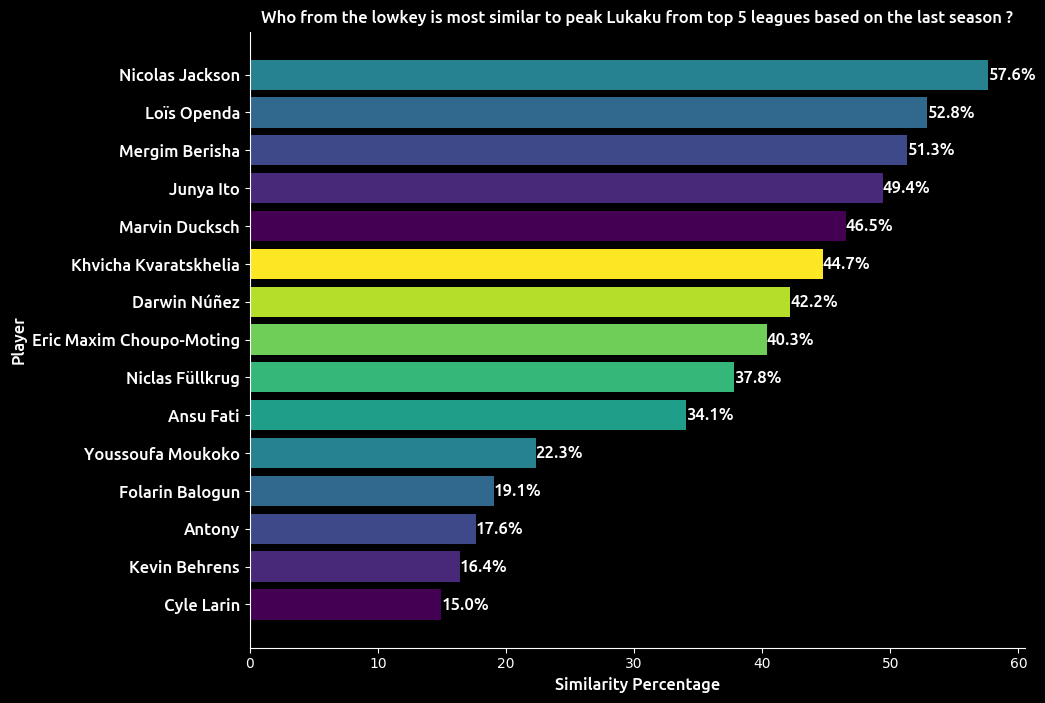

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the newbie DataFrame by similarity_to_lukaku in descending order
newbie_sorted = newbie.sort_values(by='similarity_to_lukaku', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(newbie_sorted['Player'].head(15)[::-1], (newbie_sorted['similarity_to_lukaku'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who from the lowkey is most similar to peak Lukaku from top 5 leagues based on the last season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(newbie_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Newbie_Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
